#Bùi Quang Hậu_19144255_Food_CNN

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
url='../input/cnn-food/food_train'

In [ ]:
generator= ImageDataGenerator(rescale=1./255,validation_split=0.2,rotation_range=0.1,width_shift_range=0.1,zoom_range=0.1)
train_data=generator.flow_from_directory(url,target_size=(100,100),batch_size=128,class_mode='categorical',subset='training')
validation_dataset=generator.flow_from_directory(url,target_size=(100,100),batch_size=128,class_mode='categorical',subset='validation')

Found 5268 images belonging to 10 classes.
Found 1310 images belonging to 10 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3))) #size:32x32, 3 kenh mau
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0

2022-05-19 19:00:05.032521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 19:00:05.182186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 19:00:05.182908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 19:00:05.184105: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=60,batch_size=128,validation_data=validation_dataset,verbose=1)
score=model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là:',score[0])
print('Độ chính xác kiểm tra là:',score[1])

2022-05-19 19:00:50.401374: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2022-05-19 19:00:55.319946: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


42/42 [==============================] - 156s 4s/step - loss: 2.5602 - accuracy: 0.1500 - val_loss: 2.2516 - val_accuracy: 0.1733
Epoch 2/60
42/42 [==============================] - 124s 3s/step - loss: 2.2333 - accuracy: 0.1942 - val_loss: 2.2084 - val_accuracy: 0.2145
Epoch 3/60
42/42 [==============================] - 125s 3s/step - loss: 2.1580 - accuracy: 0.2227 - val_loss: 2.1162 - val_accuracy: 0.2366
Epoch 4/60
42/42 [==============================] - 126s 3s/step - loss: 2.0803 - accuracy: 0.2559 - val_loss: 2.0487 - val_accuracy: 0.2458
Epoch 5/60
42/42 [==============================] - 127s 3s/step - loss: 2.0296 - accuracy: 0.2692 - val_loss: 1.9987 - val_accuracy: 0.3000
Epoch 6/60
42/42 [==============================] - 126s 3s/step - loss: 1.9844 - accuracy: 0.2927 - val_loss: 1.9682 - val_accuracy: 0.3229
Epoch 7/60
42/42 [==============================] - 125s 3s/step - loss: 1.9621 - accuracy: 0.3005 - val_loss: 1.9434 - val_accuracy: 0.2870
Epoch 8/60
42/42 [======

In [ ]:
model.save('./final_food.h5')

In [ ]:
model=load_model('./final_food.h5')

In [ ]:
validation_dataset.class_indices

{'Banh cuon': 0,
 'Banh khot': 1,
 'Banh tet': 2,
 'Banh xeo': 3,
 'Bun bo Hue': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Chao long': 7,
 'Com tam': 8,
 'Nem chua': 9}

Found 4 images belonging to 1 classes.


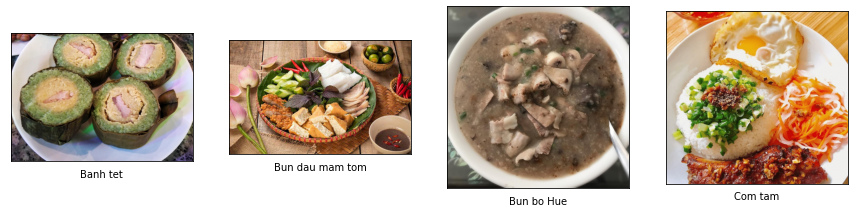

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
datagenerator=datagen.flow_from_directory('../input/test-food',
                                          target_size=(100,100),batch_size=5,
                                          interpolation="lanczos",shuffle=False)
food={0:'Banh cuon',
 1:'Banh khot',
 2:'Banh tet',
 3:'Banh xeo',
 4:'Bun bo Hue',
 5:'Bun dau mam tom',
 6:'Ca kho to',
 7:'Chao long',
 8:'Com tam',
 9:'Nem chua'}
plt.figure(figsize=(15,15))   #chiều dài với rộng của khung ảnh
for i in range(len(datagenerator.filenames)):
    plt.subplot(1,4,i+1)      #kích thước của khung ảnh, 8: dài, 5 rộng, chỗ số 8 để lớn hơn ko sao, nhưng nhớ 8*5 phải lớn hơn số ảnh test
    plt.imshow(load_img(datagenerator.filepaths[i]))
    plt.xticks([])
    plt.yticks([])
    img=load_img('../input/test-food/'+datagenerator.filenames[i],target_size=(100,100)) #nhớ có cái / này nha
    img=img_to_array(img)
    img=img.reshape(1,100,100,3)
    img=img.astype('float')
    img/=255
    plt.xlabel(food[np.argmax(model.predict(img))])  #tên model lúc mà chạy xong á (model_1)
plt.show()